In [2]:
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
import matplotlib.pyplot as plt
import numpy as np 

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
Users of this version of Gym should be able to simply replace 'import gym' with 'import gymnasium as gym' in the vast majority of cases.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


In [3]:
env = make_vec_env("HalfCheetah-v4", n_envs=4)  # vectorized for speed

/home/yifeng/work/env/mujoco/lib/python3.10/site-packages/gymnasium/envs/registration.py:512: DeprecationWarning: WARN: The environment HalfCheetah-v4 is out of date. You should consider upgrading to version `v5`.
  logger.deprecation(


In [3]:
model = PPO("MlpPolicy", env, verbose=1, tensorboard_log="./ppo_mujoco_tensorboard/")
model.learn(total_timesteps=500_000)  # adjust based on compute


Using cuda device
Logging to ./ppo_mujoco_tensorboard/PPO_4


/home/yifeng/work/env/mujoco/lib/python3.10/site-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -362     |
| time/              |          |
|    fps             | 3056     |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 8192     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -348        |
| time/                   |             |
|    fps                  | 1818        |
|    iterations           | 2           |
|    time_elapsed         | 9           |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.008514246 |
|    clip_fraction        | 0.0854      |
|    clip_range           | 0.2         |
|    entropy_loss         | -8.47       |
|    explained_variance   | -0.0175     |
|    learning_rate        | 0.

In [4]:
ant_env = make_vec_env("Ant-v4", n_envs=4)

/home/yifeng/work/env/mujoco/lib/python3.10/site-packages/gymnasium/envs/registration.py:512: DeprecationWarning: WARN: The environment Ant-v4 is out of date. You should consider upgrading to version `v5`.
  logger.deprecation(


Using cuda device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 85.8     |
|    ep_rew_mean     | -89      |
| time/              |          |
|    fps             | 1933     |
|    iterations      | 1        |
|    time_elapsed    | 4        |
|    total_timesteps | 8192     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 141         |
|    ep_rew_mean          | -145        |
| time/                   |             |
|    fps                  | 1288        |
|    iterations           | 2           |
|    time_elapsed         | 12          |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.013648506 |
|    clip_fraction        | 0.135       |
|    clip_range           | 0.2         |
|    entropy_loss         | -11.2       |
|    explained_variance   | -0.0135     |
|    learnin

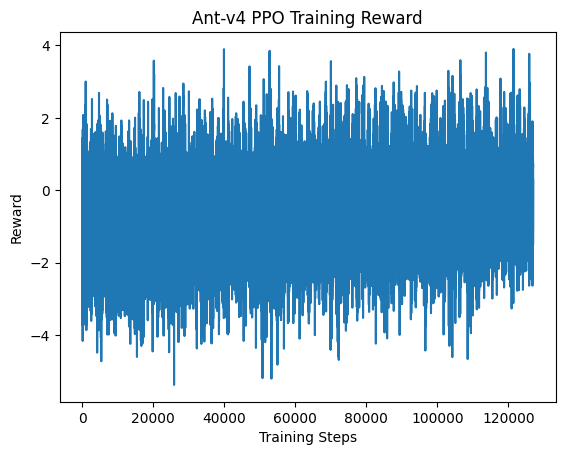

In [9]:
from stable_baselines3.common.callbacks import BaseCallback

class RewardLoggerCallback(BaseCallback):
    def __init__(self):
        super().__init__()
        self.rewards = []

    def _on_step(self) -> bool:
        self.rewards.append(self.locals['rewards'][0])
        return True

callback = RewardLoggerCallback()
ant_model = PPO("MlpPolicy", ant_env, verbose=1)
ant_model.learn(total_timesteps=500_000, callback=callback)

plt.plot(callback.rewards)
plt.xlabel("Training Steps")
plt.ylabel("Reward")
plt.title("Ant-v4 PPO Training Reward")
plt.show()

In [10]:
def evaluate_policy(model, env_name, n_episodes=5):
    env = gym.make(env_name)
    rewards = []
    for _ in range(n_episodes):
        obs, done = env.reset()
        total_reward = 0
        while True:
            action, _ = model.predict(obs)
            obs, reward, terminated, truncated, _ = env.step(action)
            total_reward += reward
            if terminated or truncated:
                break
        rewards.append(total_reward)
    return rewards

halfcheetah_rewards = evaluate_policy(model, "HalfCheetah-v4")
ant_rewards = evaluate_policy(ant_model, "Ant-v4")
print("HalfCheetah rewards:", halfcheetah_rewards)
print("Ant rewards:", ant_rewards)

HalfCheetah rewards: [np.float64(360.4515010780664), np.float64(455.1715199165513), np.float64(210.09753541596183), np.float64(391.35768345852676), np.float64(404.83435375560884)]
Ant rewards: [np.float64(31.623187053235473), np.float64(-115.21204206838036), np.float64(-6.6535992568613445), np.float64(-28.030787704062448), np.float64(-4.6376563667579465)]


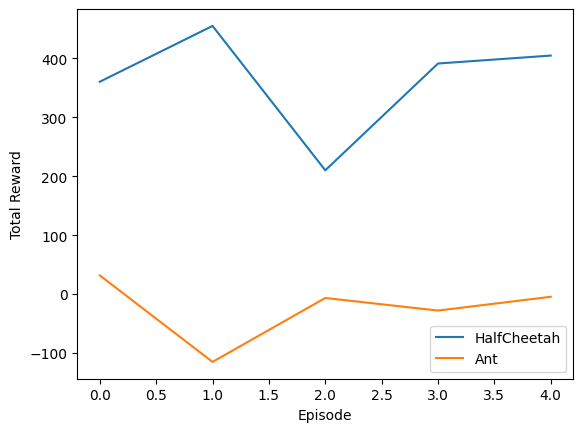

In [11]:
import matplotlib.pyplot as plt

plt.plot(halfcheetah_rewards, label="HalfCheetah")
plt.plot(ant_rewards, label="Ant")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.show()